# 1. 개요

차원이 증가할수록 데이터 포인트 간의 거리가 기하급수적으로 멀어지게 되어, 희소(sparse)한 구조를 가지게 되므로 예측 신뢰도가 떨어짐.

차원축소에는 피처선택(특정 피처에 종속성이 강한 불필요한 피처를 아예 제거)과 피처추출(기존 피처를 저차원의 중요 피처로 압축) 기법이 존재.

이미지 데이터, 텍스트 문서 등에 대해 주로 사용

# 2. PCA

PCA : 가장 대표적인 차원 축소 기법. 여러 변수간에 존재하는 상관관계를 이용해 이를 대표하는 주성분을 추출해 차원 축소하는 기법

PCA로 차원을 축소할 때는 기존 데이터의 정보 유실을 최소화하는 방향으로 진행. 즉 가장 높은 분산을 가지는 데이터의 축을 찾아 그 축을 기준으로 축소

제일 먼저 가장 큰 데이터 변동성을 기반으로 첫번째 벡터 축을 생성하고, 두번째 축은 이 벡터축에 직각이 되는 벡터를 축으로, 세번째는 다시 2번째 축에 직각이 되는 벡터를 축으로 ~~~~ 나아감.

입력 데이터의 공분산 행렬이 고유벡터와 고유값으로 분해될 수 있고, 이렇게 분해된 고유벡터를 이용해 입력데이터를 선형 변환하는 방식이 바로 PCA
1. 입력 데이터셋의 공분산 행렬 생성
2. 공분산 행렬의 고유벡터와 고유값을 계산
3. 고유값이 가장 큰 순으로 k개(PCA 변환 차수)만큼 고유벡터를 추출
4. 고유값이 가장 큰 순으로 추출된 고유벡터를 이용해 새롭게 입력데이터를 반환

In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt

iris = load_iris()
columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
irisdf = pd.DataFrame(iris.data, columns=columns)
irisdf['target'] = iris.target
irisdf.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


Text(0, 0.5, 'sepal width')

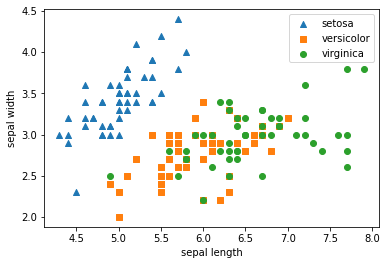

In [3]:
# setosa는 세모, versicolor는 네모, virginica는 동그라미로 표현
markers = ['^', 's', 'o']

for i, marker in enumerate(markers):
    x_axis_data = irisdf[irisdf['target'] == i]['sepal_length']
    y_axis_data = irisdf[irisdf['target'] == i]['sepal_width']
    plt.scatter(x_axis_data, y_axis_data, marker=marker, label=iris.target_names[i])
    
plt.legend()
plt.xlabel('sepal length')
plt.ylabel('sepal width')

In [4]:
# 데이터셋에 PCA 적용하기 전에 스케일링 필요. 각 속성값을 동일한 스케일로 변환
from sklearn.preprocessing import StandardScaler

iris_scaled = StandardScaler().fit_transform(irisdf.iloc[:, :-1])

In [5]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)     # 4차원 데이터를 2차원 데이터로 축소
pca.fit(iris_scaled)
iris_pca = pca.transform(iris_scaled)
print(iris_pca.shape)

(150, 2)


In [6]:
pca_columns = ['pca_component_1', 'pca_component_2']
irisdf_pca = pd.DataFrame(iris_pca, columns=pca_columns)
irisdf_pca['target'] = iris.target
irisdf_pca.head()

,pca_component_1,pca_component_2,target
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0
3,-2.299384,-0.597395,0
4,-2.389842,0.646835,0


Text(0, 0.5, 'pca_component_2')

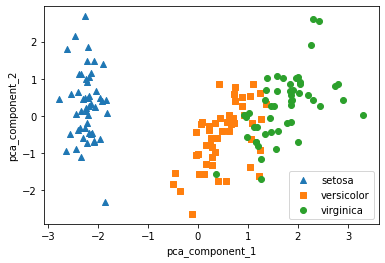

In [7]:
markers = ['^', 's', 'o']

for i, marker in enumerate(markers):
    x_axis_data = irisdf_pca[irisdf_pca['target']==i]['pca_component_1']
    y_axis_data = irisdf_pca[irisdf_pca['target']==i]['pca_component_2']
    plt.scatter(x_axis_data, y_axis_data, marker=marker, label=iris.target_names[i])
    
plt.legend()
plt.xlabel('pca_component_1')
plt.ylabel('pca_component_2')

# PCA 차원축소 눈에 띄게 분류할 수 있음 -> 좋은 차원축소

In [8]:
# 개별 PCA 컴포넌트 별로 차지하는 변동성 비율. 도합 95%
print(pca.explained_variance_ratio_)

[0.72962445 0.22850762]


In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

rcf = RandomForestClassifier(random_state=156)
scores = cross_val_score(rcf, iris.data, iris.target, scoring='accuracy', cv=3)
print('원본 데이터 교차검증 개별 정확도:', scores)
print('원본 데이터 평균 정확도:', np.mean(scores))

원본 데이터 교차검증 개별 정확도: [0.98 0.94 0.96]
원본 데이터 평균 정확도: 0.96


In [10]:
pca_X = irisdf_pca[['pca_component_1', 'pca_component_2']]
scores_pca = cross_val_score(rcf, pca_X, iris.target, scoring='accuracy', cv=3)
print('PCA 변환 데이터 교차검증 개별 정확도:', scores_pca)
print('PCA 변환 데이터 평균 정확도:', np.mean(scores_pca))

# 원본 데이터셋 대비 예측 정확도는 차원축소함에 따라 손실되는 정보로 인해 성능이 떨어질 수 밖에 없음.

PCA 변환 데이터 교차검증 개별 정확도: [0.88 0.88 0.88]
PCA 변환 데이터 평균 정확도: 0.88


신용카드 데이터에 적용

In [11]:
import pandas as pd
df = pd.read_excel('C:\\Users\\ytnal\\python\\\파머완\\data\\card\\credit_card.xls', header=1, sheet_name='Data').iloc[0:, 1:]
print(df.shape)
df.head()

(30000, 24)


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [12]:
df.rename(columns={'PAY_0': 'PAY_1', 'default payment next month':'default'}, inplace=True)
y = df['default']
X = df.drop('default', axis=1)

<AxesSubplot:>

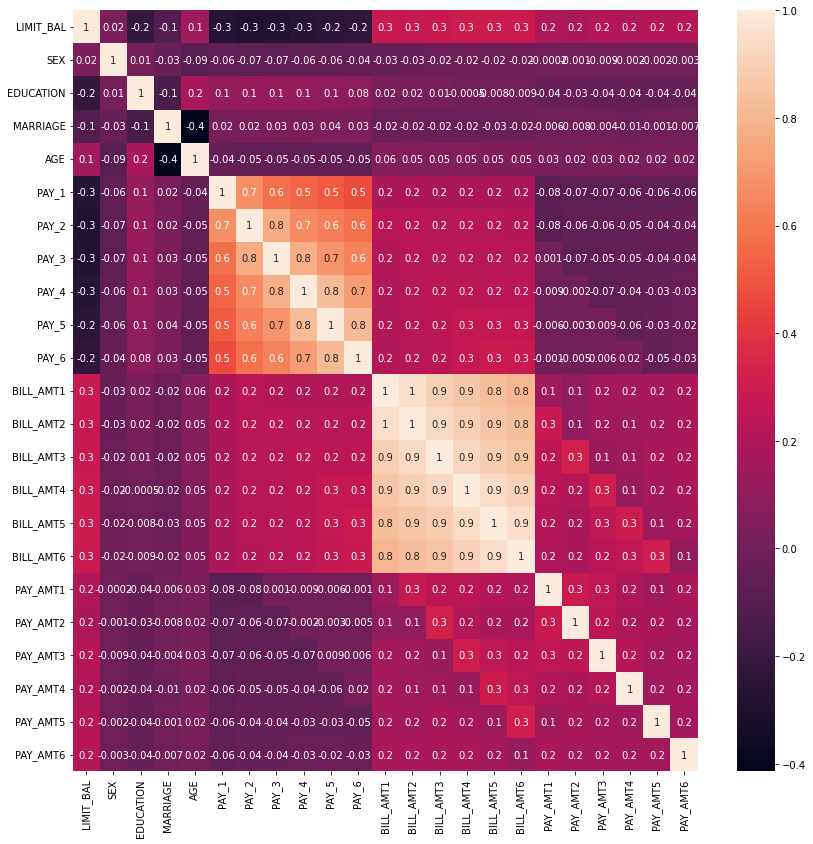

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = X.corr()
plt.figure(figsize=(14, 14))
sns.heatmap(corr, annot=True, fmt='.1g')

# Pay 속성, Bill 속성관 상관관계가 매우 높음을 알 수 있음

In [14]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# BILL_AMT1 ~ BILL_AMT6 까지 5개 속성명
cols_bill = ['BILL_AMT'+str(i) for i in range(1, 7)]
print('대상 속성명:', cols_bill)

scaler = StandardScaler()
df_cols_scaled = scaler.fit_transform(X[cols_bill])
pca = PCA(n_components=2)
pca.fit(df_cols_scaled)
print('PCA Component별 변동성:', pca.explained_variance_ratio_)

대상 속성명: ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
PCA Component별 변동성: [0.90555253 0.0509867 ]


In [16]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

rcf = RandomForestClassifier(n_estimators=300, random_state=156)
scores = cross_val_score(rcf, X, y, scoring='accuracy', cv=3)

print('CV=3인 경우의 개별 Fold 세트별 정확도:', scores)
print('평균 정확도:{:.4f}'.format(np.mean(scores)))

CV=3인 경우의 개별 Fold 세트별 정확도: [0.8083 0.8196 0.8232]
평균 정확도:0.8170


In [17]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(X)

pca = PCA(n_components=6)
df_pca = pca.fit_transform(df_scaled)
scores_pca = cross_val_score(rcf, df_pca, y, scoring='accuracy', cv=3)

print('CV=3인 경우의 PCA 변환된 개별 Fold 세트별 정확도:', scores_pca)
print('PCA 변환 데이터 셋 평균 정확도:', np.mean(scores_pca))

CV=3인 경우의 PCA 변환된 개별 Fold 세트별 정확도: [0.7909 0.7984 0.8026]
PCA 변환 데이터 셋 평균 정확도: 0.7973


# 3. LDA

선형 판별 분석법. LDA는 PCA와 유사하게 입력데이터셋을 저차원 공간에 투영해 차원을 축소하는 기법이지만, LDA는 지도학습의 분류에서 활용하기 쉽도록 개별 클래스를 분별할 수 있는 기준을 최대한 유지하면서 차원을 축소

PCA는 변동성이 가장 큰 축을 찾았지만, LDA는 입력 데이터의 결정 값 클래스를 최대한으로 분리할 수 있는 축을 찾음

LDA는 클래스간 분산과 클래스 내부 분산의 비율을 최대화하는 방식으로 차원을 축소. 즉 클래스간 분산은 최대한 크게, 클래스 내부 분산은 최대한 작게 가져감

1. 클래스 내부와 클래스간 분산 행렬을 구한다.
2. 클래스 내부 분산 행렬과 클래스간 분산 행렬의 내적을 각각 고유벡터로 분리
3. 고유값이 가장 큰 순서대로 K개(LDA 변환 차수)만큼 추출
4. 고유값이 가장 큰 순으로 추출된 고유벡터를 이용해 새롭게 입력데이터 반환

In [18]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

iris = load_iris()
iris_scaled = StandardScaler().fit_transform(iris.data)

In [21]:
lda = LinearDiscriminantAnalysis(n_components=2)
lda.fit(iris_scaled, iris.target)      # PCA는 비지도학습이지만, LDA는 지도학습이므로 라벨링이 꼭 필요
iris_lda = lda.transform(iris_scaled)
print(iris_lda.shape)

(150, 2)


Text(0, 0.5, 'lda_component_2')

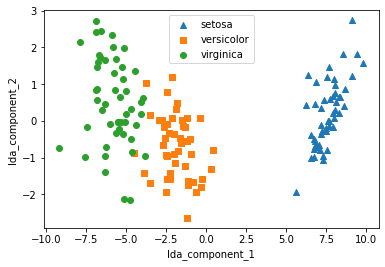

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

lda_columns = ['lda_component_1', 'lda_component_2']
irisdf_lda = pd.DataFrame(iris_lda, columns=lda_columns)
irisdf_lda['target'] = iris.target

markers = ['^', 's', 'o']

for i, marker in enumerate(markers):
    x_axis_data = irisdf_lda[irisdf_lda['target']==i]['lda_component_1']
    y_axis_data = irisdf_lda[irisdf_lda['target']==i]['lda_component_2']
    plt.scatter(x_axis_data, y_axis_data, marker=marker, label=iris.target_names[i])
    
plt.legend()
plt.xlabel('lda_component_1')
plt.ylabel('lda_component_2')

# 4. SVD

특이값 분해, PCA의 경우 정방행렬만을 고유벡터로 분해했지만, SVD는 행과 열의 크기가 다른 행렬 또한 적용 가능

행렬 A를 $ A = U \sum V^T $ 로 분해

In [24]:
import numpy as np
from numpy.linalg import svd

np.random.seed(121)
a = np.random.randn(4, 4)
print(np.round(a, 3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.014  0.63   1.71  -1.327]
 [ 0.402 -0.191  1.404 -1.969]]


In [25]:
U, Sigma, Vt = svd(a)
print(U.shape, Sigma.shape, Vt.shape)
print('U matrix:\n', np.round(U, 3))
print('Sigma value:\n', np.round(Sigma, 3))
print('V transpose matrix:\n', np.round(Vt, 3))

(4, 4) (4,) (4, 4)
U matrix:
 [[-0.079 -0.318  0.867  0.376]
 [ 0.383  0.787  0.12   0.469]
 [ 0.656  0.022  0.357 -0.664]
 [ 0.645 -0.529 -0.328  0.444]]
Sigma value:
 [3.423 2.023 0.463 0.079]
V transpose matrix:
 [[ 0.041  0.224  0.786 -0.574]
 [-0.2    0.562  0.37   0.712]
 [-0.778  0.395 -0.333 -0.357]
 [-0.593 -0.692  0.366  0.189]]


In [28]:
# Sigma를 다시 0을 포함한 대칭행렬로 변환
sigma_mat = np.diag(Sigma)      # 대각원소만
a_ = np.dot(np.dot(U, sigma_mat), Vt)
print(np.round(a_, 3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.014  0.63   1.71  -1.327]
 [ 0.402 -0.191  1.404 -1.969]]


In [29]:
# 데이터셋이 로우간 의존성이 있을 경우를 알아보기 위해 의존성 부여
a[2] = a[0] + a[1]
a[3] = a[0]
print(np.round(a, 3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.542  0.899  1.041 -0.073]
 [-0.212 -0.285 -0.574 -0.44 ]]


In [30]:
U, Sigma, Vt = svd(a)
print(U.shape, Sigma.shape, Vt.shape)
print('Sigma Value:\n', np.round(Sigma, 3))

# 이전과 차원은 동일하지만 Sigma 값 중 2개가 0으로 변함(즉 선형 독립인 로우벡터의 수가 2개라는 의미)

(4, 4) (4,) (4, 4)
Sigma Value:
 [2.663 0.807 0.    0.   ]


## Truncated SVD

$ \sum $ 행렬에 있는 대각원소(즉 특이값) 중 상위 일부만 추출해 분해하는 방식 -> 다시 원본행렬을 복구할 수는 없지만 상당한 수준으로 원본행렬을 근사함

In [32]:
# SVD는 numpy에서, Truncated SVD는 사이파이에서 지원
import numpy as np
from scipy.sparse.linalg import svds
from scipy.linalg import svd

np.random.seed(121)
matrix = np.random.random((6, 6))
print('원본 행렬:\n', matrix)
U, Sigma, Vt = svd(matrix, full_matrices=False)
print('\n분해 행렬 차원:', U.shape, Sigma.shape, Vt.shape)
print('\nSigma값 행렬:', Sigma)

# Truncated SVD로 Sigma 행렬의 특이값을 4개로 하여 수행
num_components=4
U_tr, Sigma_tr, Vt_tr = svds(matrix, k=num_components)
print('\nTruncated SVD 분해 행렬 차원:', U_tr.shape, Sigma_tr.shape, Vt_tr.shape)
print('\nTruncated SVD sigma값 행렬:', Sigma_tr)
matrix_tr = np.dot(np.dot(U_tr, np.diag(Sigma_tr)), Vt_tr)

print('\nTruncated SVD로 분해 후 복원 행렬:\n', matrix_tr)

# 6 x 6 행렬을 SVD 분해하면 각각 (6, 6), 6, (6, 6)차원이지만, Truncated의 n_components=4로 지정해 저렇게 분해함

원본 행렬:
 [[0.11133083 0.21076757 0.23296249 0.15194456 0.83017814 0.40791941]
 [0.5557906  0.74552394 0.24849976 0.9686594  0.95268418 0.48984885]
 [0.01829731 0.85760612 0.40493829 0.62247394 0.29537149 0.92958852]
 [0.4056155  0.56730065 0.24575605 0.22573721 0.03827786 0.58098021]
 [0.82925331 0.77326256 0.94693849 0.73632338 0.67328275 0.74517176]
 [0.51161442 0.46920965 0.6439515  0.82081228 0.14548493 0.01806415]]

분해 행렬 차원: (6, 6) (6,) (6, 6)

Sigma값 행렬: [3.2535007  0.88116505 0.83865238 0.55463089 0.35834824 0.0349925 ]

Truncated SVD 분해 행렬 차원: (6, 4) (4,) (4, 6)

Truncated SVD sigma값 행렬: [0.55463089 0.83865238 0.88116505 3.2535007 ]

Truncated SVD로 분해 후 복원 행렬:
 [[0.19222941 0.21792946 0.15951023 0.14084013 0.81641405 0.42533093]
 [0.44874275 0.72204422 0.34594106 0.99148577 0.96866325 0.4754868 ]
 [0.12656662 0.88860729 0.30625735 0.59517439 0.28036734 0.93961948]
 [0.23989012 0.51026588 0.39697353 0.27308905 0.05971563 0.57156395]
 [0.83806144 0.78847467 0.93868685 0.72673231 

### 사이킷런 Truncated SVD 클래스

Text(0, 0.5, 'TruncatedSVD Component 2')

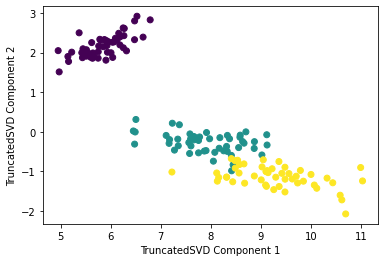

In [34]:
from sklearn.decomposition import TruncatedSVD, PCA
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

iris = load_iris()
iris_ftrs = iris.data

tsvd = TruncatedSVD(n_components=2)
tsvd.fit(iris_ftrs)
iris_tsvd = tsvd.transform(iris_ftrs)

plt.scatter(x=iris_tsvd[:, 0], y=iris_tsvd[:, 1], c=iris.target)
plt.xlabel('TruncatedSVD Component 1')
plt.ylabel('TruncatedSVD Component 2')

Text(0.5, 1.0, 'PCA Transformed')

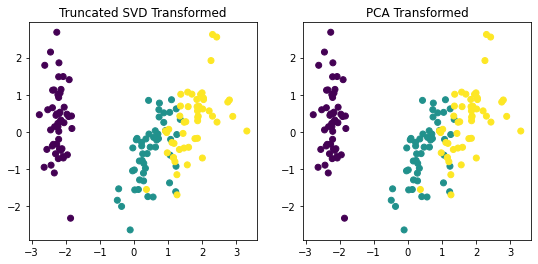

In [35]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
iris_scaled = scaler.fit_transform(iris_ftrs)

tsvd = TruncatedSVD(n_components=2)
tsvd.fit(iris_scaled)
iris_tsvd = tsvd.transform(iris_scaled)

# 스케일링 데이터를 기반으로 PCA, Truncated SVD 수행
pca = PCA(n_components=2)
pca.fit(iris_scaled)
iris_pca = pca.transform(iris_scaled)

tsvd = TruncatedSVD(n_components=2)
tsvd.fit(iris_scaled)
iris_tsvd = tsvd.transform(iris_scaled)

fig, (ax1, ax2) = plt.subplots(figsize=(9, 4), ncols=2)
ax1.scatter(x=iris_tsvd[:, 0], y=iris_tsvd[:, 1], c=iris.target)
ax2.scatter(x=iris_pca[:, 0], y=iris_pca[:, 1], c=iris.target)
ax1.set_title('Truncated SVD Transformed')
ax2.set_title('PCA Transformed')

In [36]:
print((iris_pca - iris_tsvd).mean())
print((pca.components_ - tsvd.components_).mean())

# 모두 0에 가까운 값이므로 2개의 변환이 서로 동일. 즉 스케일링 된 데이터에 대해선 SVD나 PCA나 동일함을 알 수 있음
# 하지만 PCA는 밀집행렬에 대한 변환만 가능하지만 SVD는 희소행렬에 대한 변환도 가능
# SVD는 PCA와 유사하기 CV영역에서 이미지 압축이나 NLP의 LSA에 대해 사용할 때 적용

2.3465951404233465e-15
-2.0816681711721685e-17


# 5. NMF(Non-Negative Matrix Factorization)

낮은 랭크를 통한 행렬근사 방식의 변형

C:\Anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1692: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


Text(0, 0.5, 'NMF Component 2')

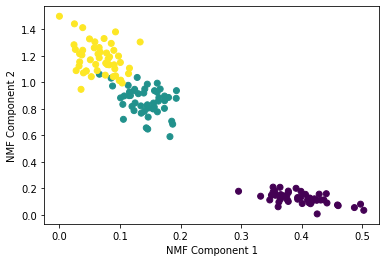

In [37]:
from sklearn.decomposition import NMF
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

iris = load_iris()
iris_ftrs = iris.data
nmf = NMF(n_components=2)
nmf.fit(iris_ftrs)
iris_nmf = nmf.transform(iris_ftrs)

plt.scatter(x=iris_nmf[:, 0], y=iris_nmf[:, 1], c=iris.target)
plt.xlabel('NMF Component 1')
plt.ylabel('NMF Component 2')